In [1]:
import uproot, pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [6]:
ParticleTruth = pd.read_hdf("../data_base1/ab-7.h5", "ParticleTruth").set_index("EventID")

In [5]:
PETruth = pd.read_hdf("../data_base1/ab-7.h5", "PETruth").set_index("EventID")

In [7]:
alpha_label = ParticleTruth.query("Alpha==1")
beta_label = ParticleTruth.query("Alpha==0")

In [9]:
alpha_data = PETruth.loc[alpha_label.index]
beta_data = PETruth.loc[beta_label.index]

In [10]:
alpha_data.head()

,ChannelID,PETime,PEType
EventID,,,
1,0,301,1
1,0,351,1
1,1,256,1
1,1,262,1
1,1,264,1


In [15]:
beta_cerenkov = beta_data.query("PEType==0")
beta_scintillation = beta_data.query("PEType==1")

In [12]:
beta_cerenkov.head()

,ChannelID,PETime,PEType
EventID,,,
4,6,250,0
4,19,248,0
4,19,248,0
8,14,276,0
9,0,270,0


In [18]:
alpha_cerenkov = alpha_data.query("PEType==0")
alpha_scintillation = alpha_data.query("PEType==1")

[]

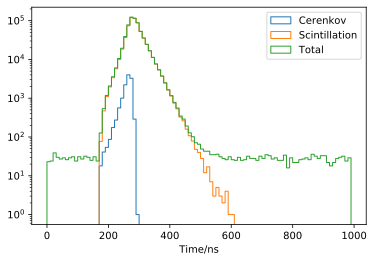

In [24]:
bw = np.arange(0,1000,10)
plt.hist(beta_cerenkov["PETime"], bins=bw,histtype='step', label='Cerenkov');
plt.hist(beta_scintillation["PETime"], bins=bw,histtype='step', label='Scintillation');
plt.hist(beta_data["PETime"], bins=bw,histtype='step', label='Total');
plt.legend(); plt.xlabel("Time/ns");
plt.semilogy()

In [25]:
def cf_show(d, bw, title):
    plt.hist(d.query("PEType==1")["PETime"], bins=bw, label="Scintillation", histtype="step")
    plt.hist(d.query("PEType==0")["PETime"], bins=bw, label="Cerenkov", histtype="step")
    plt.hist(d['PETime'], bins=bw, label="Total", histtype="step")
    plt.legend(); plt.xlabel("Time/ns")
    plt.yscale("log")
    plt.title(title)

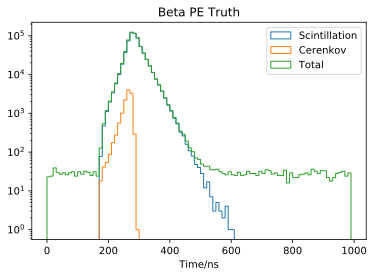

In [26]:
cf_show(beta_data, bw, "Beta PE Truth")

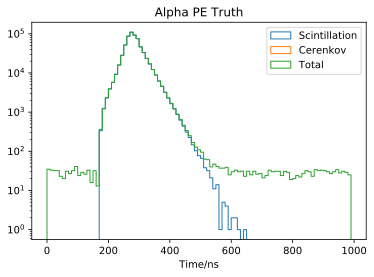

In [27]:
cf_show(alpha_data, bw, "Alpha PE Truth")

## 时间对齐

In [29]:
## 百分比对齐 --- --- --- 
np.quantile?

In [31]:
t0 = PETruth.groupby(PETruth.index)['PETime'].apply(lambda x: np.median(x))

In [41]:
t0 = PETruth.groupby(PETruth.index)['PETime'].apply(lambda x: np.quantile(x,0.1))

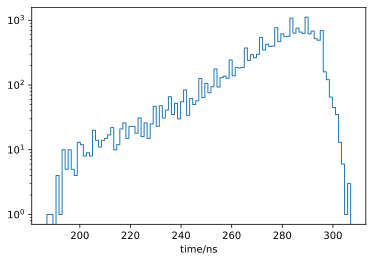

In [35]:
plt.hist(t0, bins=100, histtype="step"); plt.xlabel("time/ns"); plt.yscale("log")

In [36]:
PEt= PETruth.groupby(PETruth.index)['PETime'].apply(lambda x: x - np.quantile())

In [37]:
PEt.head()

EventID
1    32.0
1    82.0
1   -13.0
1    -7.0
1    -5.0
Name: PETime, dtype: float64

In [38]:
PETruth['PETime'] = PEt

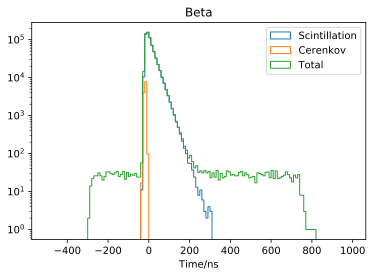

In [40]:
cf_show(PETruth.loc[beta_label.index], np.arange(-500,1000,10), "Beta")

## 空间分布

In [42]:
beta_data.groupby("ChannelID").count()

,PETime,PEType
ChannelID,,
0,22428,22428
1,22147,22147
2,21161,21161
3,21944,21944
4,22872,22872
5,21747,21747
6,23474,23474
7,21995,21995
8,22305,22305


In [45]:
b_c = beta_cerenkov.groupby("ChannelID")["PETime"].count()

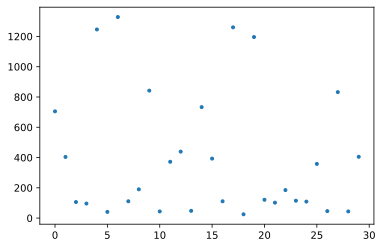

In [51]:
plt.plot(b_c, "o", ms=3)

In [54]:
PMT = pd.read_csv("../data_base1/PMT_Positions.txt",sep='\t', skiprows=8, header=None, names=("ChannelID", "x", "y", "z")).set_index("ChannelID")

In [55]:
PMT.head()

,x,y,z
ChannelID,,,
0,428,139,700
8,0,451,700
16,-428,139,700
24,-265,-364,700
1,265,-364,700


In [57]:
phi = np.arctan2(PMT.y, PMT.x)

In [58]:
rho2 = PMT.x**2+PMT.y**2

In [60]:
theta = np.arctan2(PMT.z, np.sqrt(rho2))

In [61]:
r = np.sqrt(rho2+PMT.z**2)

Text(0.5, 1.0, 'PMT Positions')

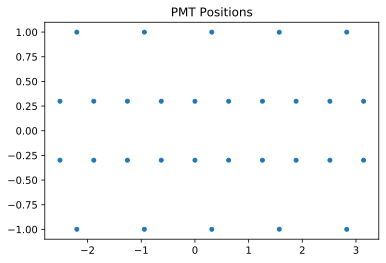

In [68]:
plt.plot(phi, theta, 'o', ms=4); plt.title("PMT Positions")

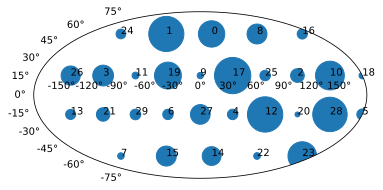

In [74]:
plt.subplot(111, projection="mollweide")
#plt.plot(phi, theta, 'o', ms=4); plt.title("PMT Positions")
plt.scatter(phi, theta, s=b_c)
for p,t,s in zip(phi, theta, PMT.index.values.astype("str")):
    plt.text(p,t,s)

In [79]:
b_c

ChannelID
0      705
1      404
2      106
3       96
4     1246
5       41
6     1328
7      111
8      190
9      842
10      44
11     372
12     439
13      48
14     733
15     393
16     111
17    1260
18      25
19    1196
20     121
21     102
22     185
23     115
24     109
25     358
26      46
27     832
28      44
29     405
Name: PETime, dtype: int64